In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

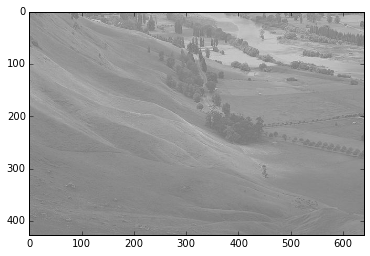

In [2]:
# loads image
im = plt.imread('images/original.jpg')
# shows image without color range auto-scaling
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

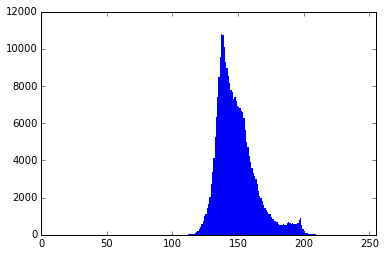

In [3]:
# draws histogram
def draw_im_histo(im):
    data = im.ravel()
    plt.hist(data, bins=255, range=(0, 255), linewidth=0, color='b')
    plt.xlim(0, 255)
    plt.show()

draw_im_histo(im)

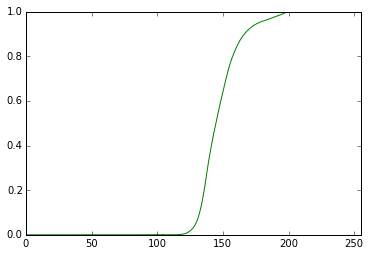

In [4]:
# draws cdf
def draw_im_cdf(im):
    data = im.ravel()
    cnts = np.bincount(data)
    cdf = np.cumsum(cnts) / float(data.size)
    plt.plot(cdf, 'g')
    plt.xlim(0, 255)
    plt.show()
    return cdf

cdf = draw_im_cdf(im)

In [5]:
transform = np.round(cdf * 255).astype('int')
def xform(x):
    return transform[x]
xform_v = np.vectorize(xform)

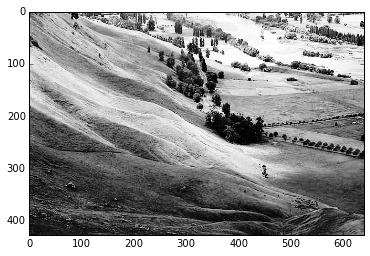

In [6]:
im_eq = xform_v(im)
plt.imshow(im_eq, cmap='gray', vmin=0, vmax=255)
plt.show()

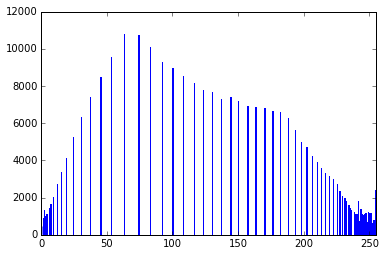

In [7]:
draw_im_histo(im_eq)

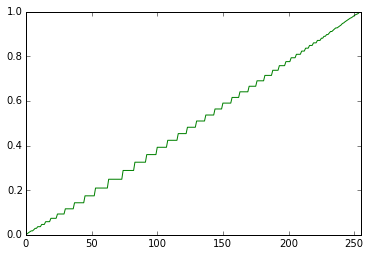

In [8]:
draw_im_cdf(im_eq);